# Network assortativity

## Data import

In [35]:
import networkx as nx
import seaborn as sns

In [36]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/lordgrilo/.virtualenvs/stenv/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['zipf']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [37]:
filepath = "./../datasets/ca-AstroPh.txt"

In [38]:
G = nx.Graph()

In [39]:
fh = open(filepath, "r")
for line in fh.readlines():
    s = line.strip().split()
    if s[0] != "#":
        origin = int(s[0])
        dest = int(s[1])
        G.add_edge(origin, dest)
fh.close()

In [40]:
print("The graph has", len(G), "nodes and", len(G.edges()), "edges")

The graph has 18772 nodes and 198110 edges


## Degree assortativity of a network

Assortativity can be measured in different ways. A simple approach is measuring the average nearest neighbor degree to assess the level of degree-assortativity.

In [41]:
from collections import defaultdict

In [42]:
x = []
y = []

avg_knn = defaultdict(list)

for n in G.nodes():

    k = G.degree(n)
    total = 0
    for j in G.neighbors(n):
        total += G.degree(j)

    avg_knn[k].append(float(total) / k)

    x.append(k)
    y.append(float(total) / k)

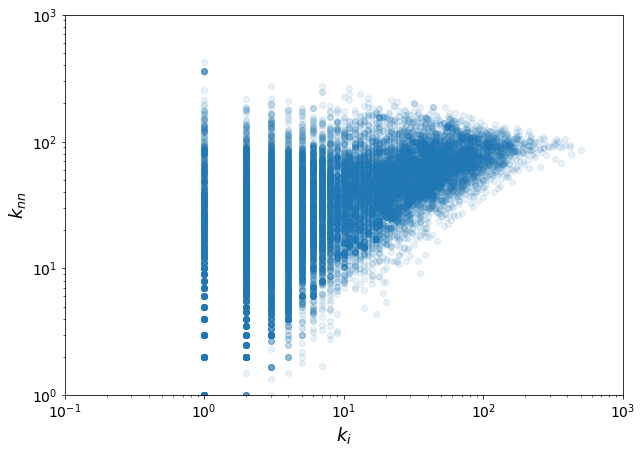

In [45]:
plt.figure(figsize=(10, 7))
plt.scatter(x, y, alpha=.1)

plt.xlabel("$k_i$", fontsize=18)
plt.ylabel("$k_{nn}$", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale("log")
plt.xscale("log")
plt.axis([0.1, 1000, 1, 1000])
plt.show()

In [46]:
z = []

for k in sorted(avg_knn.keys()):
    knn = np.array(avg_knn[k])
    z.append(np.mean(knn))

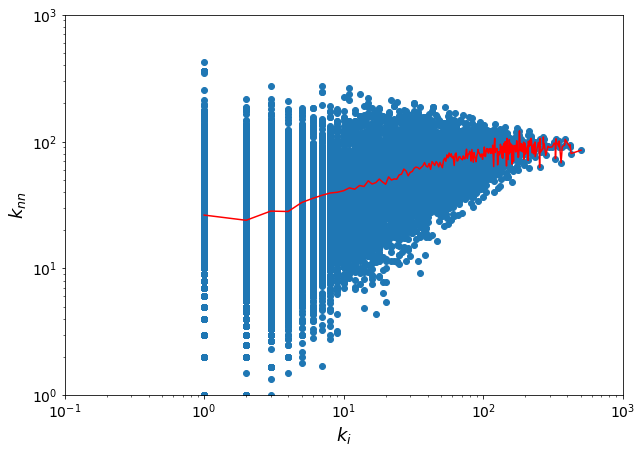

In [47]:
plt.figure(figsize=(10, 7))
plt.scatter(x, y)
plt.plot(sorted(avg_knn.keys()), z, "-r")

plt.xlabel("$k_i$", fontsize=18)
plt.ylabel("$k_{nn}$", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale("log")
plt.xscale("log")
plt.axis([0.1, 1000, 1, 1000])
plt.show()

In [48]:
r = nx.degree_assortativity_coefficient(G)

In [49]:
print(r)

0.20512067898648886


The degree assortativity coefficient of a ER graph is zero. The ER graph has no correlations.

In [50]:
nnodes = 18000
plink = 0.00122

ER = nx.fast_gnp_random_graph(nnodes, plink)

In [51]:
nx.density(G)

0.0011244455715955115

In [52]:
ERr = nx.degree_assortativity_coefficient(ER)
ERr

0.0033587222046492036

NetworkX offers a number of functions to compute the same quantity.

In [53]:
knn_avg2 = nx.average_degree_connectivity(G)

In [56]:
print(knn_avg2)

{75: 77.99882352941177, 31: 58.04037897586284, 43: 69.43556771545828, 2: 23.927865037812683, 90: 77.11203703703704, 42: 60.331389698736636, 118: 78.43502824858757, 30: 57.107625272331155, 113: 80.56814159292036, 3: 28.27523510971787, 28: 58.709793351302785, 8: 39.26327433628319, 158: 86.37341772151899, 13: 44.994888023369036, 77: 73.6357733175915, 36: 62.516007532956685, 257: 86.91439688715953, 12: 42.094705443698736, 134: 89.48258706467662, 55: 78.45880077369439, 171: 82.84210526315789, 86: 81.7296511627907, 15: 48.993356242840775, 274: 96.15328467153284, 47: 67.27006769825918, 91: 80.11648351648351, 22: 49.707849419303166, 150: 90.85555555555555, 14: 44.20594010800196, 6: 35.63912864775997, 52: 71.10063224446786, 67: 75.60914179104478, 108: 87.86516203703704, 27: 60.657407407407405, 142: 87.4906103286385, 62: 64.69180470793374, 7: 37.66788247213779, 61: 76.44262295081967, 49: 68.4408811143505, 132: 81.35950413223141, 41: 67.15829746532759, 5: 33.02613981762918, 32: 61.44760338345865,

In [57]:
knn_avg3 = nx.k_nearest_neighbors(G)  # deprecated though...

/var/folders/bh/0ngr808d52sg9hxwrvf2hgd80000gn/T/ipykernel_7939/876408507.py:1: DeprecationWarning: k_nearest_neighbors function is deprecated and will be removed in v3.0.
Use `average_degree_connectivity` instead.
  knn_avg3 = nx.k_nearest_neighbors(G)  # deprecated though...


In [58]:
print(knn_avg3)

{75: 77.99882352941177, 31: 58.04037897586284, 43: 69.43556771545828, 2: 23.927865037812683, 90: 77.11203703703704, 42: 60.331389698736636, 118: 78.43502824858757, 30: 57.107625272331155, 113: 80.56814159292036, 3: 28.27523510971787, 28: 58.709793351302785, 8: 39.26327433628319, 158: 86.37341772151899, 13: 44.994888023369036, 77: 73.6357733175915, 36: 62.516007532956685, 257: 86.91439688715953, 12: 42.094705443698736, 134: 89.48258706467662, 55: 78.45880077369439, 171: 82.84210526315789, 86: 81.7296511627907, 15: 48.993356242840775, 274: 96.15328467153284, 47: 67.27006769825918, 91: 80.11648351648351, 22: 49.707849419303166, 150: 90.85555555555555, 14: 44.20594010800196, 6: 35.63912864775997, 52: 71.10063224446786, 67: 75.60914179104478, 108: 87.86516203703704, 27: 60.657407407407405, 142: 87.4906103286385, 62: 64.69180470793374, 7: 37.66788247213779, 61: 76.44262295081967, 49: 68.4408811143505, 132: 81.35950413223141, 41: 67.15829746532759, 5: 33.02613981762918, 32: 61.44760338345865,

In [59]:
r2 = nx.degree_pearson_correlation_coefficient(G)
print(r2)
r_ER = nx.degree_pearson_correlation_coefficient(ER)
print(r_ER)

0.20512067898643183
0.0033587222046453226


## Comparisong with CM

In [61]:
deg_seq = list(dict(G.degree).values())


In [62]:
CM_G = nx.configuration_model(deg_seq)

In [63]:
CM_G.number_of_nodes()

18772

In [64]:
knn_CM_G = nx.average_degree_connectivity(CM_G)

In [65]:
k1, k2 = np.mean(np.array(deg_seq)), np.mean(np.array(deg_seq) ** 2)

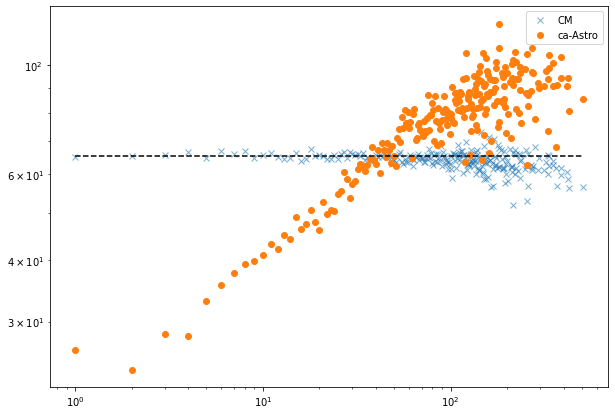

In [66]:
plt.figure(figsize=(10, 7))
plt.loglog(knn_CM_G.keys(), knn_CM_G.values(), "x", alpha=0.6, label="CM")
plt.loglog(knn_avg2.keys(), knn_avg2.values(), "o", label="ca-Astro")
plt.hlines(k2 / k1, np.min(deg_seq), np.max(deg_seq), colors="k", linestyles="dashed")
plt.legend()

In [67]:
CM_Gs = nx.configuration_model(deg_seq, create_using=nx.Graph())
knn_CM_Gs = nx.average_degree_connectivity(CM_Gs)

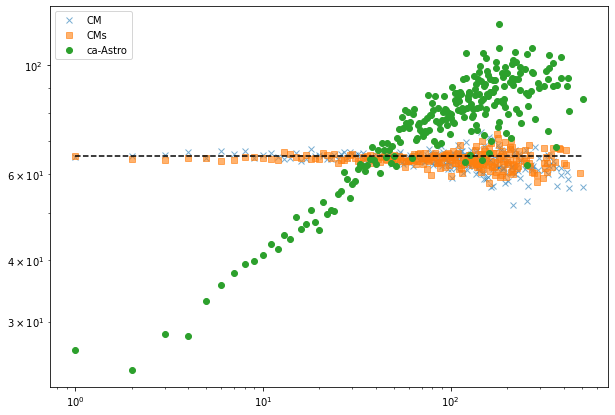

In [68]:
plt.figure(figsize=(10, 7))
plt.loglog(knn_CM_G.keys(), knn_CM_G.values(), "x", alpha=0.6, label="CM")
plt.loglog(knn_CM_Gs.keys(), knn_CM_Gs.values(), "s", alpha=0.6, label="CMs")
plt.loglog(knn_avg2.keys(), knn_avg2.values(), "o", label="ca-Astro")
plt.hlines(k2 / k1, np.min(deg_seq), np.max(deg_seq), colors="k", linestyles="dashed")
plt.legend()

## structural correlations

In [76]:
from scipy.stats import zipf

a = 2.2
seq = zipf.rvs(a, loc=1, size=10000)
if np.sum(seq) % 2 != 0:
    seq[0] = seq[0] + 1

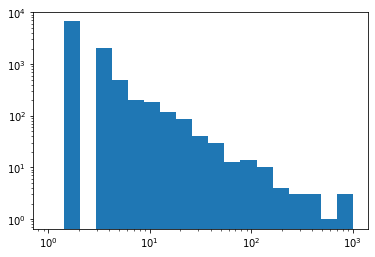

In [70]:
plt.hist(seq, np.logspace(0, 3, 20))
plt.xscale("log")
plt.yscale("log")

In [71]:
k1, k2 = np.mean(np.array(seq)), np.mean(np.array(seq) ** 2)

In [78]:
gs = nx.configuration_model(seq)
pls_knn = nx.average_degree_connectivity(gs)

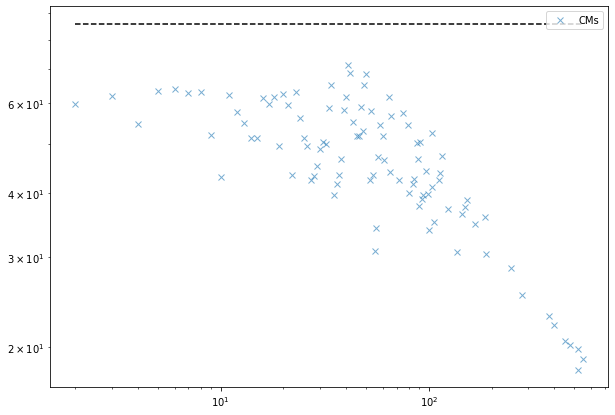

In [79]:
plt.figure(figsize=(10, 7))

plt.loglog(pls_knn.keys(), pls_knn.values(), "x", alpha=0.6, label="CMs")
plt.hlines(k2 / k1, np.min(seq), np.max(seq), colors="k", linestyles="dashed")
plt.legend()

### Homework: Implement the different randomization algorithms? 